<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-18/litao3_dryEIS_ycut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 572.4 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 901, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 901 (delta 124), reused 31 (delta 21), pack-reused 710
Receiving objects: 100% (901/901), 46.59 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (493/493), done.


'/content'

### 18-07-24 EIS on ungated and dry sample of LiTaO3, Ycut



In [4]:
%cd "/content/gator/data/07-18/"

/content/gator/data/07-18


### High to low

/usr/local/lib/python3.10/dist-packages/impedance/models/circuits/circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
/usr/local/lib/python3.10/dist-packages/impedance/models/circuits/elements.py:81: RuntimeWarning: divide by zero encountered in divide
  z += 1 / elem


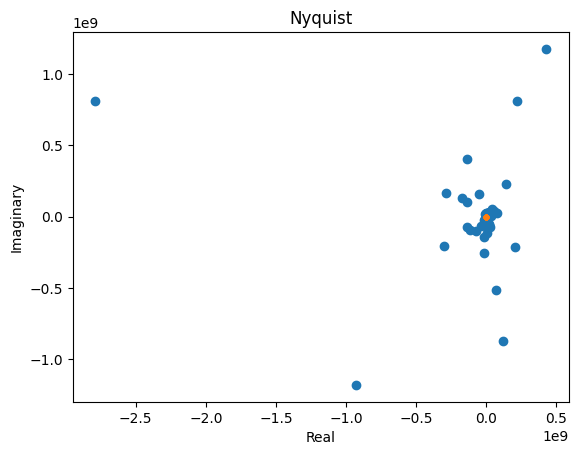

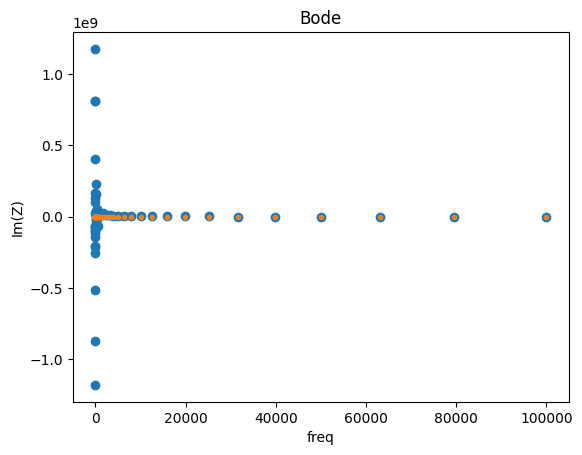

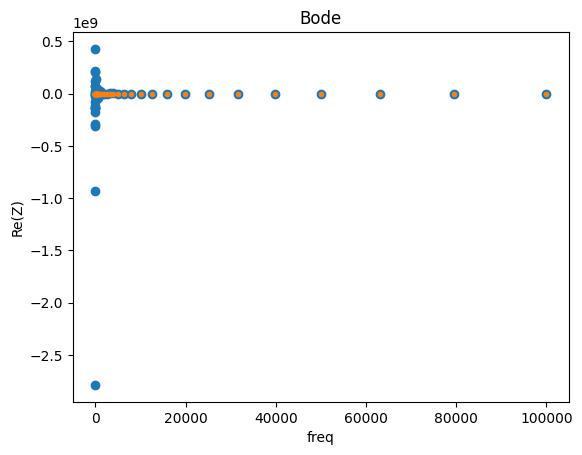

In [5]:
freqs, Z = preprocessing.readZPlot('YcutLiTaO3-Dryhtol.z')

circuit = 'R0,C0'
init = [0, 10**-24]

circuit = CustomCircuit(circuit, initial_guess=init)
# circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [6]:
print(circuit)


Circuit string: R0,C0
Fit: False

Initial guesses:
     R0 = 0.00e+00 [Ohm]
     C0 = 1.00e-24 [F]



<ipython-input-7-fe5322a4c8f6>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(freqs[cut:]), np.log(np.abs(Z_fit[cut:])), '.')


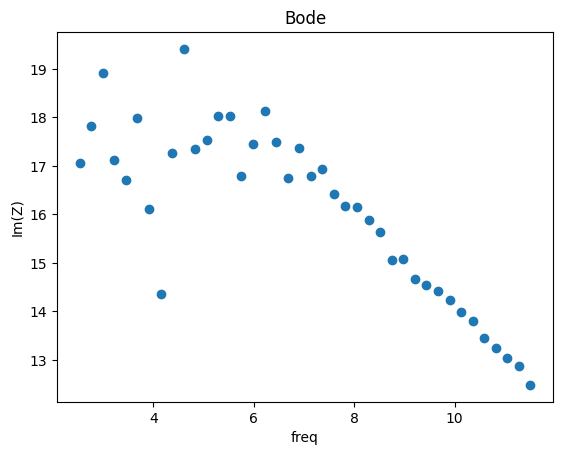

In [7]:
cut = 40
plt.plot(np.log(freqs[:cut]), np.log(np.abs(Z[:cut])), 'o')
plt.plot(np.log(freqs[cut:]), np.log(np.abs(Z_fit[cut:])), '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

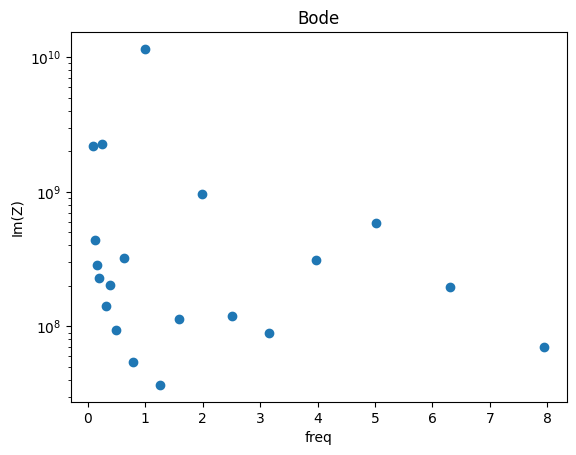

In [ ]:
cut = 40
plt.plot(freqs[cut:], np.abs(Z[cut:]), 'o')
plt.semilogy()
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
freqs.shape

(60,)

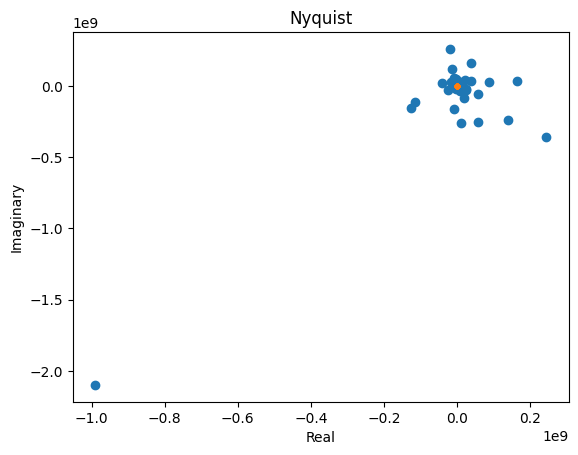

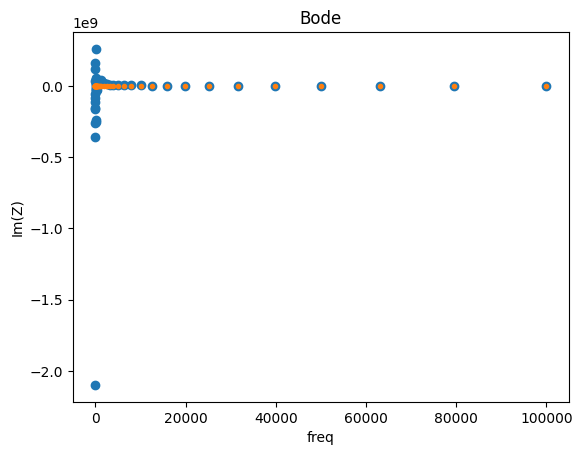

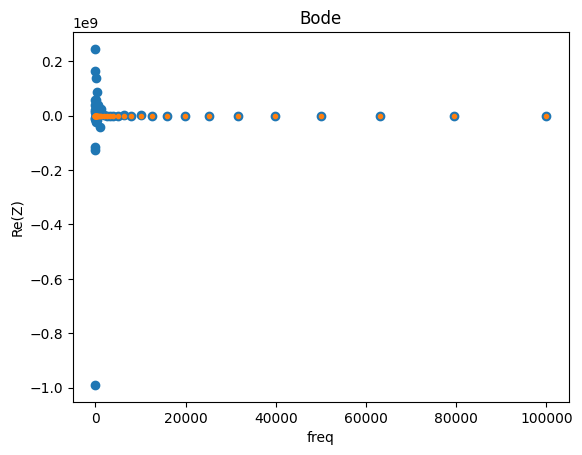

In [8]:
freqs, Z = preprocessing.readZPlot('YcutLiTaO3-Dryltoh.z')
freqs, Z = np.delete(freqs, 32), np.delete(Z, 32) # remove 1 noise point (argmin(Z.imag))

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

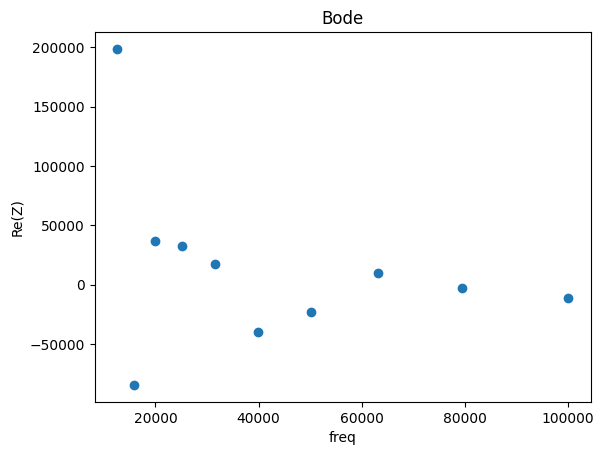

In [ ]:
cut = 50
plt.plot(freqs[cut:], Z.real[cut:], 'o')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()